# HOUSE PREDICTION PROJECT

Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor

Data Preprocessing

In [6]:
df = pd.read_csv('hpp_dataset.csv')

In [7]:
df.head(10)

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
0,1360,5,3,3,26,1,9,11312334
1,4272,2,1,1,21,0,6,15604278
2,3592,3,3,3,16,2,9,17113836
3,966,1,3,2,26,0,5,6975217
4,4926,2,3,1,28,0,1,16558138
5,3944,5,2,3,2,2,6,17353525
6,3671,5,1,1,16,0,4,14925250
7,3419,1,3,2,1,1,9,15752676
8,630,5,3,1,21,1,6,7450389
9,2185,5,3,1,6,2,1,10655081


In [8]:
df.tail(10)

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
9990,2837,2,4,1,9,2,6,13049948
9991,708,5,2,3,23,0,9,9258245
9992,2960,4,1,2,6,1,2,11595810
9993,3942,2,2,3,29,2,9,17447634
9994,3211,3,3,1,24,0,5,14660615
9995,2837,2,3,1,28,0,9,14443676
9996,1791,1,1,1,9,0,2,6734992
9997,2698,2,2,2,6,1,5,11421032
9998,1900,2,1,1,17,1,2,6888427
9999,3155,3,1,1,19,1,5,13733735


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Area_sqft       10000 non-null  int64
 1   Bedrooms        10000 non-null  int64
 2   Bathrooms       10000 non-null  int64
 3   Floors          10000 non-null  int64
 4   Age_of_House    10000 non-null  int64
 5   Garage          10000 non-null  int64
 6   Location_Score  10000 non-null  int64
 7   Price           10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [10]:
df.describe()

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,2756.729500,2.983900,2.505500,2.00170,14.674800,1.005300,5.024500,1.293165e+07
std,1292.352479,1.413308,1.127252,0.81949,8.727019,0.815683,2.574522,4.098322e+06
min,501.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,3.026652e+06
25%,1624.000000,2.000000,1.000000,1.00000,7.000000,0.000000,3.000000,9.624321e+06
50%,2772.500000,3.000000,3.000000,2.00000,15.000000,1.000000,5.000000,1.295325e+07
75%,3873.000000,4.000000,4.000000,3.00000,22.000000,2.000000,7.000000,1.625145e+07
max,4999.000000,5.000000,4.000000,3.00000,29.000000,2.000000,9.000000,2.304416e+07


In [11]:
df.shape

(10000, 8)

In [12]:
df.isnull().sum()

Area_sqft         0
Bedrooms          0
Bathrooms         0
Floors            0
Age_of_House      0
Garage            0
Location_Score    0
Price             0
dtype: int64

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

### CORRELATION HEAT MAP (EDA)
Analysis


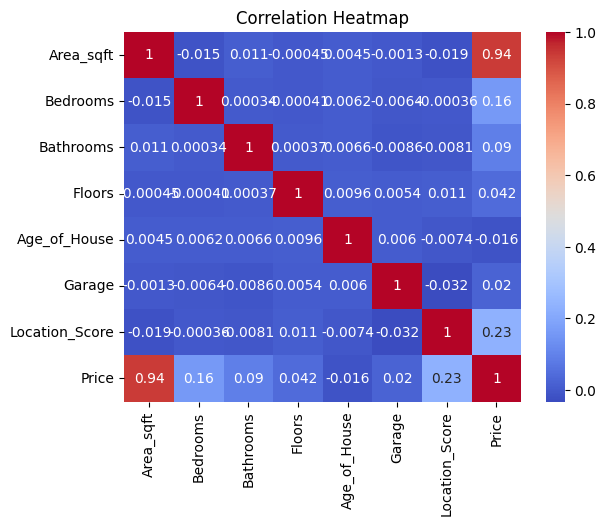

In [14]:
plt.Figure(figsize=(4,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

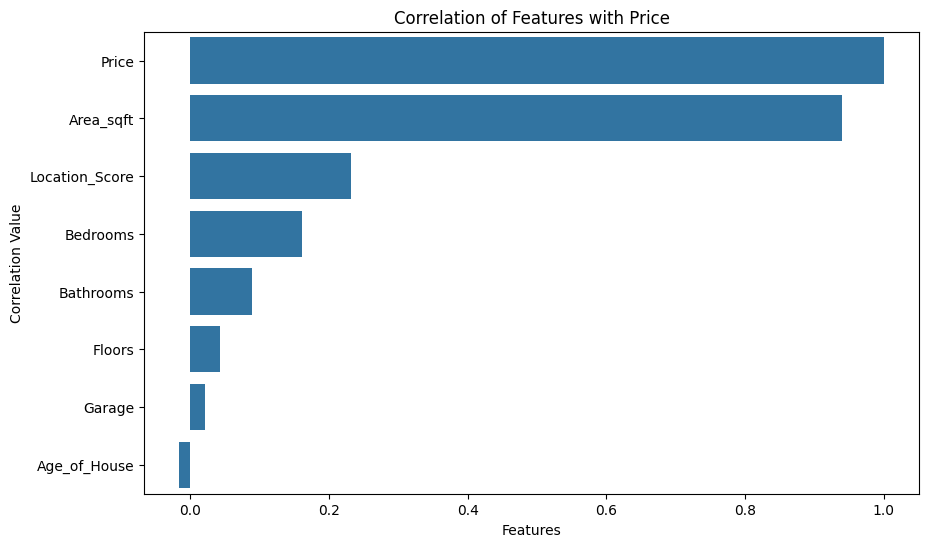

In [15]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlation of Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.show()

### Define Featues & Target

In [16]:
x = df.drop('Price', axis=1)
y = df['Price']

### Train-Test split
train_test_split() – splits data into training and testing (from scikit-learn)

x – input features

y – output/target

test_size=0.2 – 20% test, 80% train

random_state=42 – same split every run

X_train – training inputs

X_test – testing inputs

y_train – training labels

y_test – testing labels

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
    )

### Model Training
We use these models to compare different regression algorithms and pick the best one for the data.

All are from scikit-learn.

LinearRegression – simple linear prediction

Ridge / Lasso – linear models that reduce overfitting

DecisionTree – rule-based, handles non-linear data

RandomForest / ExtraTrees – multiple trees for better accuracy

GradientBoosting – improves predictions step by step

SVR – works well for complex, small datasets

KNN – predicts using nearest neighbors

Purpose: find the most accurate regression model.

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

### Create Model dictionary

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

### Train+ Evaluate all Models

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

for name, model in models.items():
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

print(results_df)

               Model           MAE          RMSE  R2 Score
1              Ridge  3.998369e+05  5.020290e+05  0.984867
2              Lasso  3.998392e+05  5.020311e+05  0.984867
0  Linear Regression  3.998392e+05  5.020312e+05  0.984867
5  Gradient Boosting  4.239772e+05  5.282364e+05  0.983246
4      Random Forest  4.726034e+05  5.838542e+05  0.979532
6        Extra Trees  4.763863e+05  5.896114e+05  0.979126
3      Decision Tree  6.787017e+05  8.558956e+05  0.956015
8                KNN  9.956779e+05  1.238367e+06  0.907920
7                SVR  3.461505e+06  4.080554e+06  0.000216


### Pick best Model

In [24]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")    

Best Model: Ridge


### Save best model

In [25]:
import os
import pickle

print("Current working directory:", os.getcwd())
file_path = os.path.join(os.getcwd(), 'best_model.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"Best model saved to: {file_path}")

Current working directory: c:\Users\Zoya\OneDrive\Desktop\Clg\pythoncode\HPP
Best model saved to: c:\Users\Zoya\OneDrive\Desktop\Clg\pythoncode\HPP\best_model.pkl
